In [1]:
# ! pip install numpy pandas matplotlib seaborn missingno

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## Seção 1 - Importando Arquivos

In [3]:
df = pd.read_csv('./risco_credito.csv')
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


In [4]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, end='\n')
    print('-'*50)
    print('FEATURE DATA TYPES')
    print(data.info())
    print('-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', end='\n')
    print(data.nunique())   
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE:')
    print(data.isnull().sum())   

show_info(df)

DATASET SHAPE:  (64592, 10)
--------------------------------------------------
FEATURE DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   signo                       43825 non-null  object 
 7   genero                      57406 non-null  object 
 8   perfil_facebook             58185 non-null  object 
 9   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.9+ MB
None
--------------------------------------------------
N

## Seção 2  - Tratamento dos dados 1

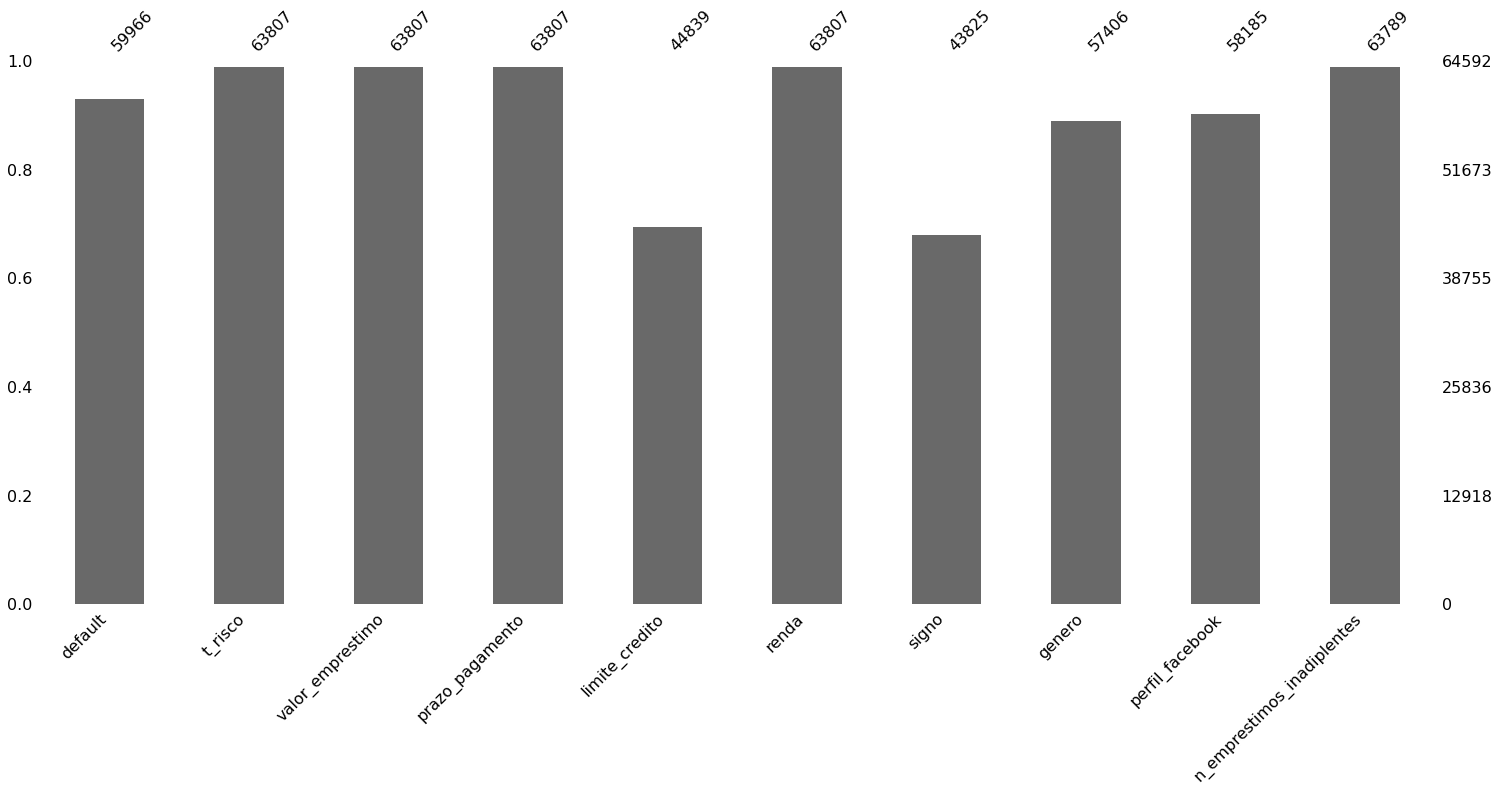

In [5]:
msno.bar(df);

1) Exclusão das linhas referentes a default que estão nulas

In [6]:
df = df.dropna(subset=['default'])

2) Pelo resumo das variáveis quantitativas, o ideal é substituir os valores faltantes do limite de crétido e do númedo de empréstimos com inadiplência pela mediana

In [7]:
df.describe()

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,59966.000000,59966.000000,59966.000000,41187.000000,5.996600e+04,59948.000000
mean,0.294114,13411.805468,40.674649,34093.005997,7.132578e+04,0.004671
std,0.101183,7957.402823,9.504775,36783.480509,5.169143e+04,0.079059
min,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000
25%,0.220000,7225.987500,36.000000,9907.000000,4.402786e+04,0.000000
50%,0.290000,12012.400000,36.000000,25338.000000,6.004726e+04,0.000000
75%,0.360000,18036.645000,36.000000,46759.500000,8.503961e+04,0.000000
max,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,5.000000


In [8]:
valores_preechimento = {
    'limite_credito': df['limite_credito'].median(),
    'n_emprestimos_inadiplentes': df['n_emprestimos_inadiplentes'].median(),    
}
df = df.fillna(value=valores_preechimento)

3) Substituindo as qualitativas pela moda

In [9]:
df['genero'].value_counts()

m    38497
f    18473
Name: genero, dtype: int64

In [10]:
df['perfil_facebook'].value_counts()

False    33997
True     19998
Name: perfil_facebook, dtype: int64

In [11]:
df['signo'].value_counts()

libr     5582
virg     5571
cance    5541
leo      3507
gemi     3499
scor     3091
arie     3045
pisce    2992
capr     2958
aqua     2839
sagi     1402
taur     1001
Name: signo, dtype: int64

In [12]:
df['genero'] = df['genero'].fillna(df['genero'].mode()[0])
df['perfil_facebook'] = df['perfil_facebook'].fillna(df['perfil_facebook'].mode()[0])

In [13]:
df.isnull().sum()

default                           0
t_risco                           0
valor_emprestimo                  0
prazo_pagamento                   0
limite_credito                    0
renda                             0
signo                         18938
genero                            0
perfil_facebook                   0
n_emprestimos_inadiplentes        0
dtype: int64

## Seção 3 - Análise exploratória e tratamento dos dados 2

1) Variáveis Qualitativas

In [14]:
va_nominal = ['object', 'bool']
qualitativas = list(df.select_dtypes(include=va_nominal).columns)
qualitativas

['default', 'signo', 'genero', 'perfil_facebook']

In [15]:
df_quali = df[qualitativas]
df_quali.head()

,default,signo,genero,perfil_facebook
0,False,virg,f,True
1,False,sagi,f,False
2,False,libr,m,True
3,False,NaN,m,False
4,False,libr,m,False


default


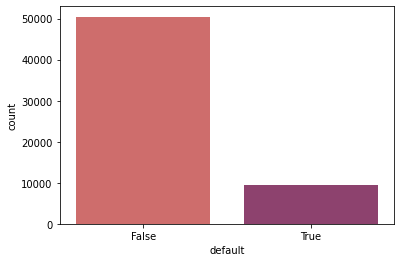

signo


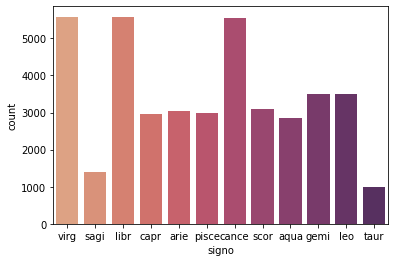

genero


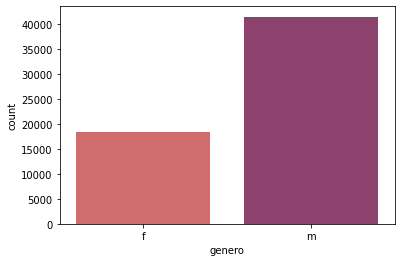

perfil_facebook


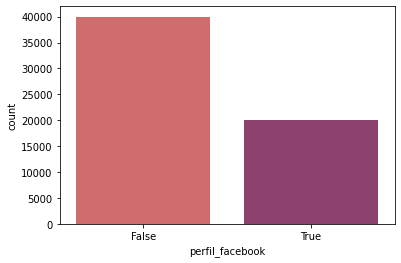

In [16]:
for va_nominal in df_quali:
    print(va_nominal)
    sns.countplot(df_quali[va_nominal], palette='flare')
    plt.show();

1. A variável resposta (**Default**) possui classes desbalanceadas;
2. **Signo**, as classes possuem contagens bem parecidas, só se destacando as contagens dos desconhecidos, que apresenta 31% dos dados, logo vou preferir apagar essas coluna do que perder informação dessas linhas;
3. **Genero**, o desconhecido será substituído por masculino, pois, possui uma frequência superios;
4. **Perfil_facebook**, o desconhecido será substituido por falso

In [17]:
df = df.drop(columns='signo')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 0 to 64591
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     59966 non-null  float64
 2   valor_emprestimo            59966 non-null  float64
 3   prazo_pagamento             59966 non-null  float64
 4   limite_credito              59966 non-null  float64
 5   renda                       59966 non-null  float64
 6   genero                      59966 non-null  object 
 7   perfil_facebook             59966 non-null  bool   
 8   n_emprestimos_inadiplentes  59966 non-null  float64
dtypes: bool(1), float64(6), object(2)
memory usage: 6.2+ MB


2) Variáveis QUantitivativas

1. A taxa de risco teve um pico em torno de 0.3;
2. 75% pediram empréstimo no valor de até 18036,6;
3. 75% tem limite de crédito até 35125 e o valor máximo foi de 613117;
4. 75% tem renda até 8500;
5. 75% não foram inadiplentes com empréstimos.

In [19]:
df.describe()

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,59966.000000,59966.000000,59966.000000,59966.000000,5.996600e+04,59966.000000
mean,0.294114,13411.805468,40.674649,31351.281393,7.132578e+04,0.004669
std,0.101183,7957.402823,9.504775,30753.702302,5.169143e+04,0.079048
min,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000
25%,0.220000,7225.987500,36.000000,17316.500000,4.402786e+04,0.000000
50%,0.290000,12012.400000,36.000000,25338.000000,6.004726e+04,0.000000
75%,0.360000,18036.645000,36.000000,35125.000000,8.503961e+04,0.000000
max,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,5.000000


In [20]:
va_quantitativa = ['float64']
quantitativas = list(df.select_dtypes(include=va_quantitativa).columns)
quantitativas

['t_risco',
 'valor_emprestimo',
 'prazo_pagamento',
 'limite_credito',
 'renda',
 'n_emprestimos_inadiplentes']

In [21]:
df_quanti = df[quantitativas]

t_risco


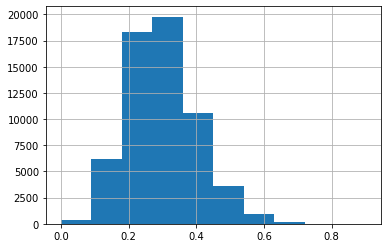

valor_emprestimo


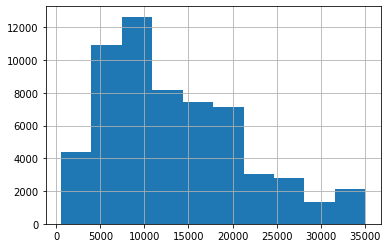

prazo_pagamento


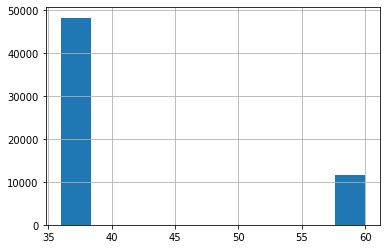

limite_credito


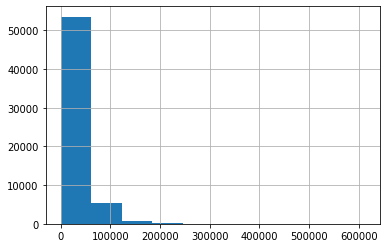

renda


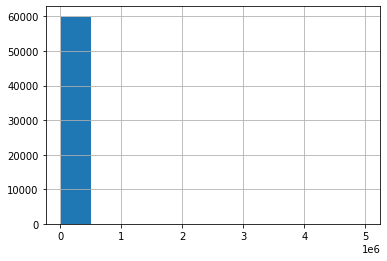

n_emprestimos_inadiplentes


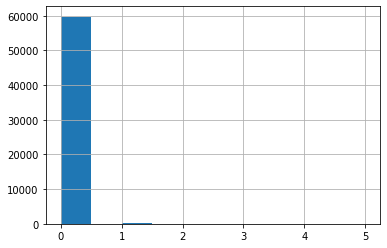

In [22]:
for va_quantitativa in df_quanti:
    print(va_quantitativa)
    df_quanti[va_quantitativa].hist(bins=10)
    plt.show();

3) Análise Bivariada

Parece que os clientes consideradores com risco de não pagar o empréstimo, não há diferença entre o sexo e possuir ou não perfil no facebook

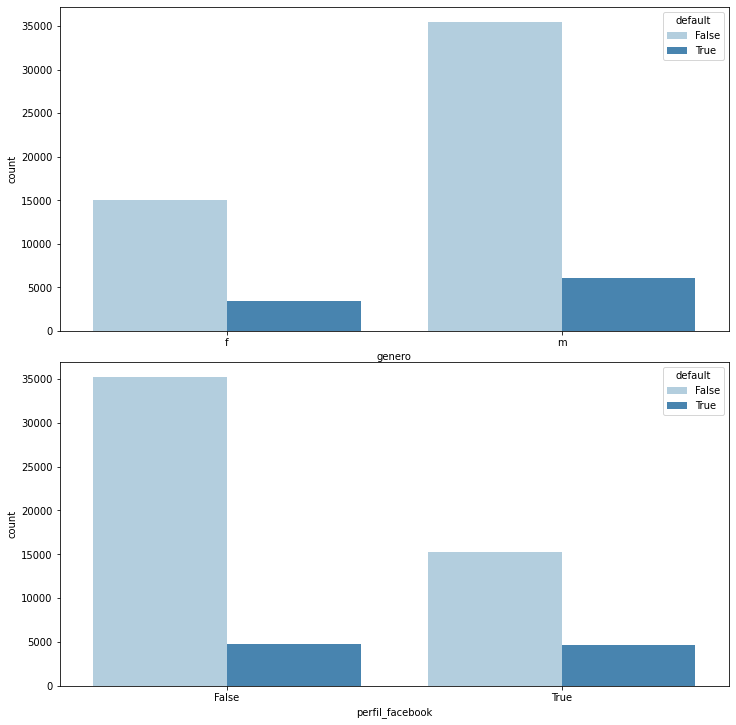

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
plt.tight_layout(1)

sns.countplot(df['genero'], hue=df.default, ax=ax[0], palette='Blues')
sns.countplot(df['perfil_facebook'], hue=df.default, ax=ax[1], palette='Blues');

t_risco


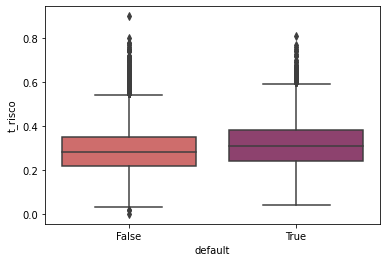

valor_emprestimo


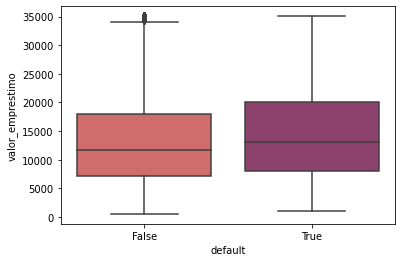

prazo_pagamento


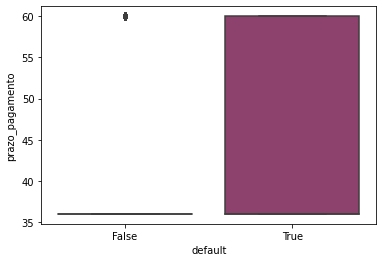

limite_credito


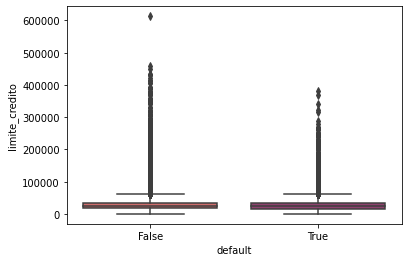

renda


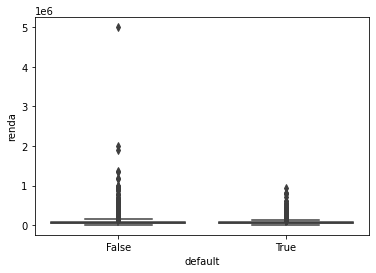

n_emprestimos_inadiplentes


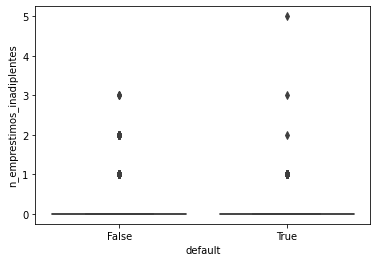

In [24]:
for va_quantitativa in df_quanti:
    print(va_quantitativa)
    sns.boxplot(y=df_quanti[va_quantitativa], x='default', data=df, palette='flare')
    plt.show();

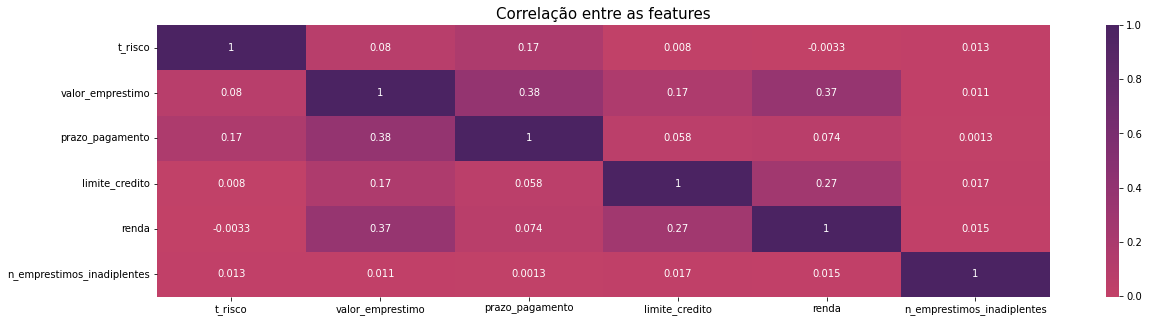

In [25]:
plt.figure(figsize=(20,5))
plt.title('Correlação entre as features', size=15)
sns.heatmap(df_quanti.corr(), cmap='flare', center=0, annot=True);

ValueError: object arrays are not supported

<Figure size 1080x504 with 0 Axes>

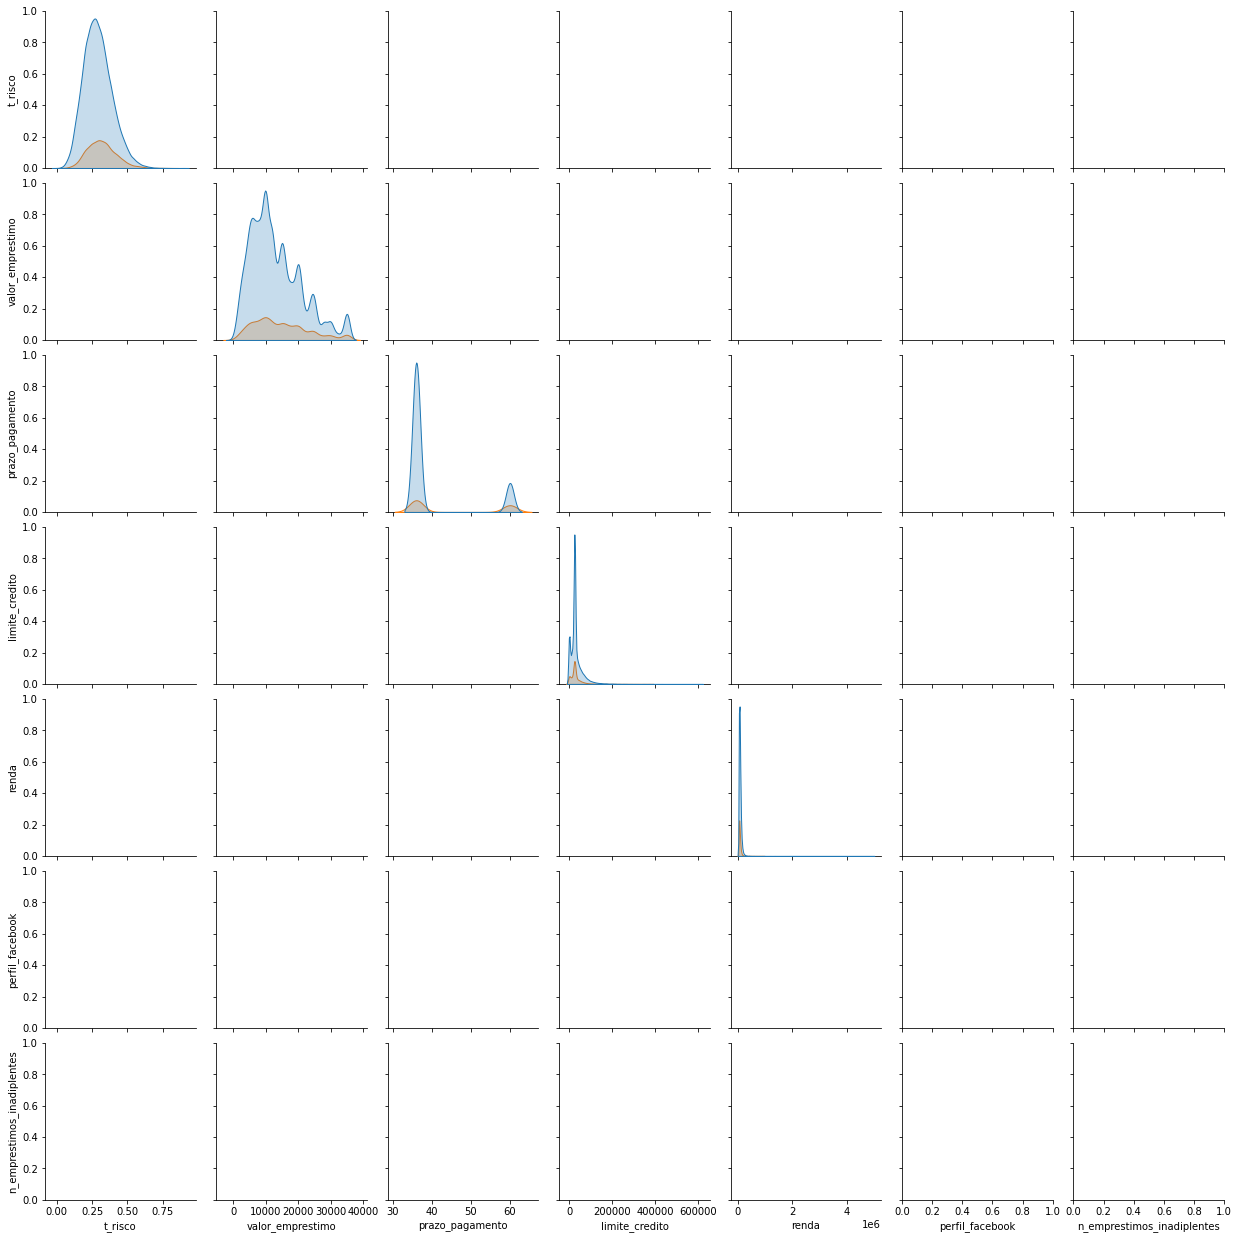

In [26]:
plt.figure(figsize=(15,7))
sns.pairplot(data=df, hue='default')

In [27]:
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,True,0.0
1,False,0.23,10046.51,36.0,25338.0,46016.31,f,False,0.0
2,False,0.30,21228.25,60.0,25338.0,48025.47,m,True,0.0
3,False,0.15,23032.33,36.0,25338.0,46011.12,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,False,0.0


4) Transdormando em variáveis binárias

In [28]:
df = pd.get_dummies(df, columns=['prazo_pagamento', 'genero', 'perfil_facebook', 'default'], drop_first=True)

In [29]:
df.head()

,t_risco,valor_emprestimo,limite_credito,renda,n_emprestimos_inadiplentes,prazo_pagamento_60.0,genero_m,perfil_facebook_True,default_True
0,0.43,20024.31,62386.0,59869.05,0.0,1,0,1,0
1,0.23,10046.51,25338.0,46016.31,0.0,0,0,0,0
2,0.30,21228.25,25338.0,48025.47,0.0,1,1,1,0
3,0.15,23032.33,25338.0,46011.12,0.0,0,1,0,0
4,0.08,24026.29,32366.0,90026.17,0.0,0,1,0,0


5) Substituindo outlier por quantil

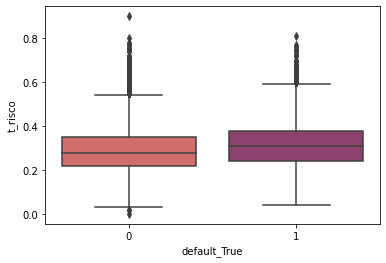

In [30]:
sns.boxplot(data=df, x='default_True', y='t_risco', palette='flare');

In [31]:
out_max = df['t_risco'].quantile(0.975)
out_max

0.51

In [32]:
df.loc[df['t_risco'] > out_max, 't_risco'] = out_max

In [33]:
out_min = df['t_risco'].quantile(0.025)
out_min

0.12

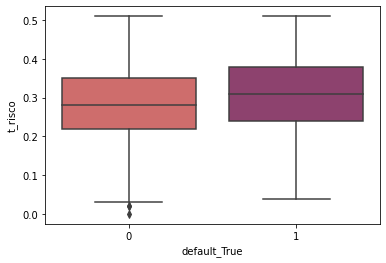

In [34]:
sns.boxplot(data=df, x='default_True', y='t_risco', palette='flare');